In [1]:
import numpy as np
from mkutils import create_fig, save_to_file
import copy, os
import matplotlib as plt

In [2]:
carbon ='Dodecane'
exp_dG = 54.86 #kJ/mol

if os.path.isfile('bsResults_rhs.xvg') and os.path.isfile('bsResults_lhs.xvg'):
    lhs_profile = np.loadtxt('bsResult_lhs.xvg', comments=['@', '#'])
    rhs_profile = np.loadtxt('bsResult_rhs.xvg', comments=['@', '#'])
    error = True
else:
    lhs_profile = np.loadtxt('profile_lhs.xvg', comments=['@', '#'])
    rhs_profile = np.loadtxt('profile_rhs.xvg', comments=['@', '#'])
    error = False
lhs_histo = np.loadtxt('histo_lhs.xvg', comments=['@', '#'])

lhs_histo[:,0] *= -1
lhs_histo = np.flip(lhs_histo, axis=0)
lhs_profile[:,0] *= -1
lhs_profile = np.flip(lhs_profile, axis=0)

rhs_histo = np.loadtxt('histo_rhs.xvg', comments=['@', '#'])

frames = np.loadtxt('frames.dat', skiprows=4, usecols=[0,1])
complete = np.loadtxt('../complete.txt')

frames = [item for item in frames if item[0] in complete]
histo = np.concatenate((lhs_histo, rhs_histo), axis=0)
profile= np.concatenate((lhs_profile, rhs_profile), axis=0)

In [18]:
np.where(profile[:,0]<1, profile[:,1],0 )

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

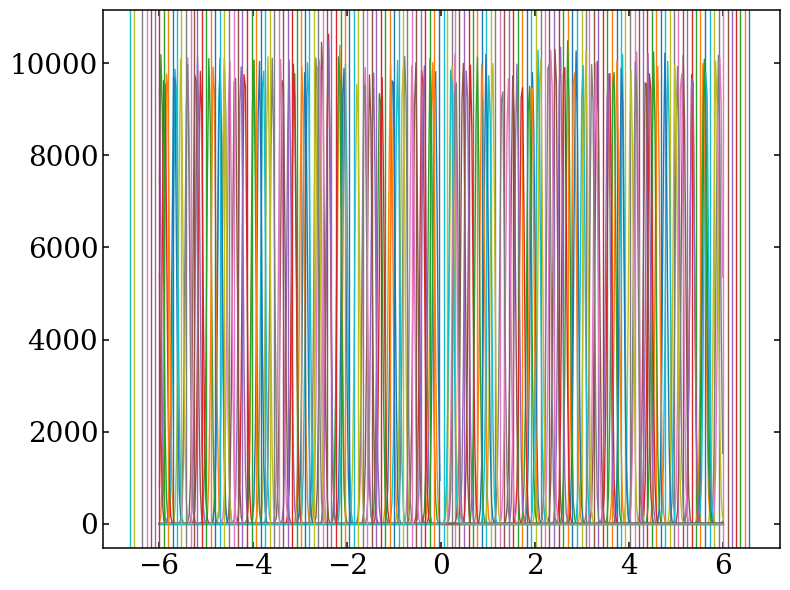

In [12]:
fig, axes = create_fig(1, 1)
ax = axes[0]

for i, (frame, distance) in enumerate(frames):        
    ci = int(i - (np.floor(i/10) * 10))
    if distance < 0:
        ax.plot(histo[200:, 0], histo[200:, i+1-len(rhs_histo[0,:])], color='C{:d}'.format(ci))
    else:
        ax.plot(histo[:200, 0], histo[:200, i+1], color='C{:d}'.format(ci))
    ax.axvline(x=distance, color='C{:d}'.format(ci))
    #print('C{:d} : frame {:d}, distance: {:.3f}'.format(ci, int(frame), distance))
#print('\n')



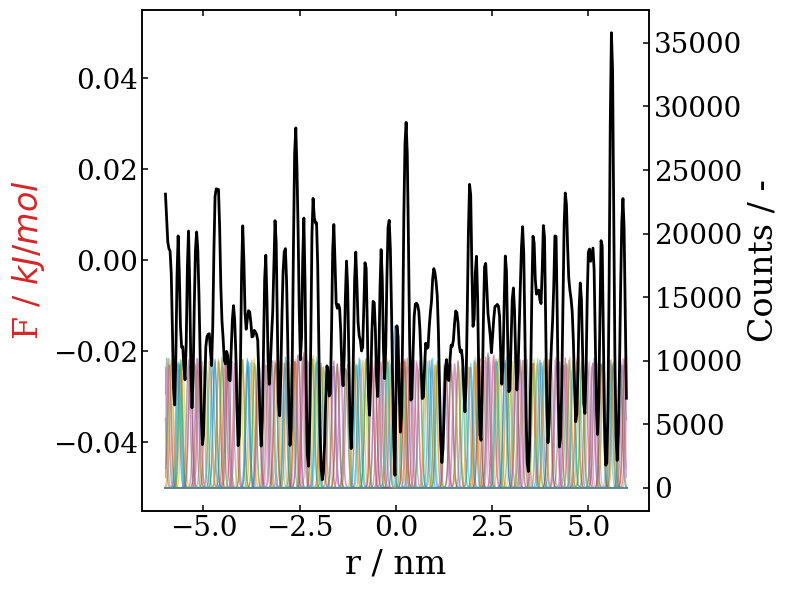

In [33]:
histofig, ax = create_fig(1,1)
ax = ax[0]

ax2 = ax.twinx()
#ax.errorbar(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), profile[:,2], capsize=2, color='C3', lw=3)
cum_hist = np.zeros((400, len(rhs_histo[0,:])))
#cum_hist[:200, 0] = lhs_histo[:, 0]
#cum_hist[200:, 0] = rhs_histo[:, 0]
cum_hist[:,0] = histo[:, 0]
for i in range(1,(len(rhs_histo[0,:])+len(lhs_histo[0,:]))):
    if i>(len(rhs_histo[0,:])-1):
        ax2.plot(-histo[:,0], histo[:,i-len(rhs_histo[0,:])], alpha=0.5)
        cum_hist[200:, 1] += histo[200:, i-len(rhs_histo[0,:])]
    else:
        ax2.plot(histo[:,0], histo[:,i], alpha=0.5)
        cum_hist[:200, 1] += histo[:200, i]
    
ax2.plot(cum_hist[:, 0], cum_hist[:,1], color='k', lw=2)
if error:
    ax.errorbar(profile[:,0], profile[:,1], profile[:,2], capsize=2, color='C3', lw=3)
ax.plot(profile[:,0], profile[:,1],  color='C3', lw=3)

ax.set_xlabel('r / nm')
ax.set_ylabel('F / $kJ/mol$', color='C3')
ax2.set_ylabel('Counts / -')
save_to_file('PMF_COUNT_separate')

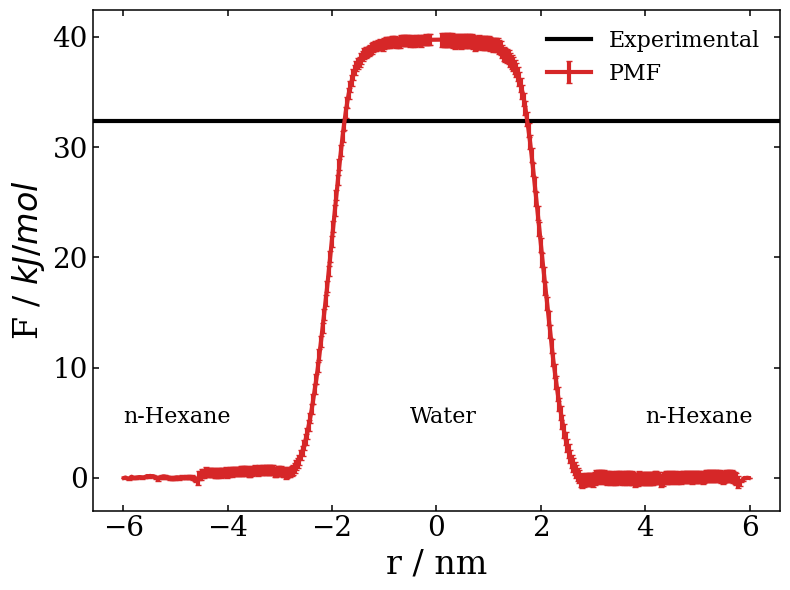

In [121]:
histofig, ax = create_fig(1,1)
ax = ax[0]

if error:
    ax.errorbar(profile[:,0], profile[:,1], profile[:,2], capsize=2, color='C3', lw=3, label='PMF')
ax.plot(profile[:,0], profile[:,1],  color='C3', lw=3, label='PMF')

ax.axhline(exp_dG, *ax.get_xlim(), lw=3, color='k', label='Experimental')
fontdict={'fontsize':16}
ax.text(4, 5, 'n-{:s}'.format(carbon), fontdict=fontdict)
ax.text(-0.5, 5, 'Water', fontdict=fontdict)
ax.text(-6, 5, 'n-{:s}'.format(carbon), fontdict=fontdict)

ax.set_xlabel('r / nm')
ax.set_ylabel('F / $kJ/mol$')

save_to_file('F_separate')